# Import Lib

In [1]:
"""
Feature Importance Analysis Setup:
- Encode categorical variables (car type, area, age bucket).
- Define features (X) and targets (y) for modeling.
"""

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt


# Prepare Data

In [2]:

df = pd.read_csv("cleaned_loan_data.csv")
print("Data loaded. Shape:", df.shape)
df.head()

# Separate features and target
X = df.drop(columns=["applicationoutcome", "funded", "id", "apr_pct", "age"])
y_approval = df["applicationoutcome"]
y_funded = df["funded"]

# Identify categorical and numeric features
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
numeric_features = X.select_dtypes(include=["number"]).columns.tolist()

print(categorical_features, numeric_features)

# Preprocessing: one-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

Data loaded. Shape: (10000, 12)
['cartype', 'area', 'age_bucket'] ['loanamount', 'deposit', 'apr', 'depositratio']


# Logistic Regression Pipeline

In [ ]:
# Logistic Regression pipeline
log_reg = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])

# Logistic Regression Model Evaluation for approval

Approval Model Metrics
Accuracy: 0.978
Precision: 0.9903173749327595
Recall: 0.9745897300158815
F1: 0.9823906083244397
ROC-AUC: 0.9982050613743216


e:\Abi\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


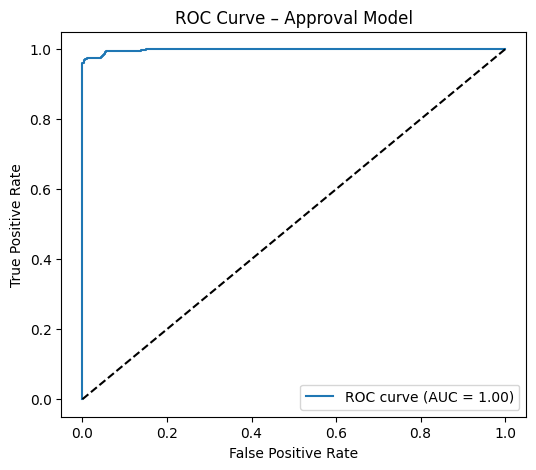

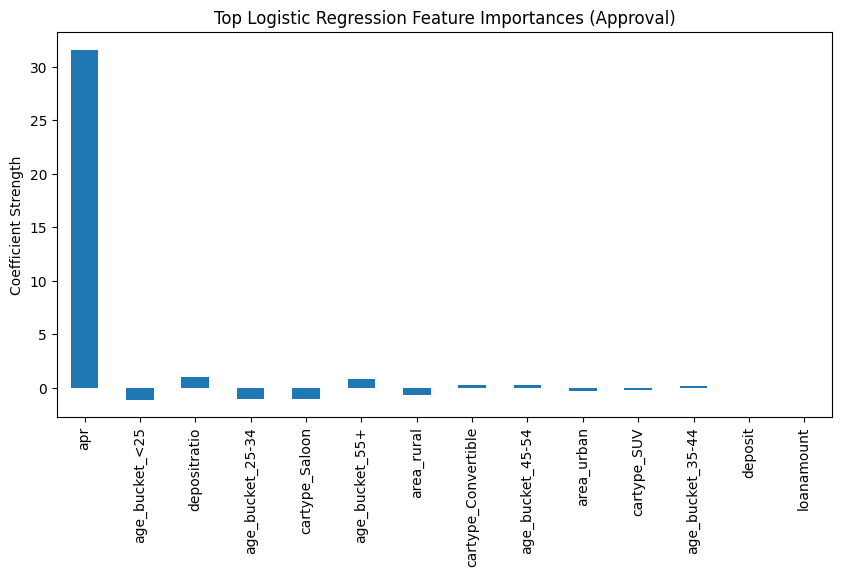

In [ ]:
"""
Logistic Regression Model Evaluation – Approval Prediction
- Splits dataset into train/test
- Trains logistic regression
- Reports Accuracy, Precision, Recall, F1, ROC-AUC
- Extracts coefficients as feature importance.
"""

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

# Train-test split (approval model, full dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y_approval, test_size=0.3, random_state=42)

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:,1]

# Metrics
print("Approval Model Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="ROC curve (AUC = %.2f)" % roc_auc_score(y_test, y_proba))
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Approval Model")
plt.legend()
plt.show()

# Get feature names
feature_names = (
    log_reg.named_steps["preprocessor"]
    .named_transformers_["cat"]
    .get_feature_names_out(categorical_features)
)
all_features = list(feature_names) + numeric_features

# Extract coefficients
coeff_importance = pd.Series(
    log_reg.named_steps["classifier"].coef_[0], index=all_features
).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,5))
coeff_importance.head(15).plot(kind="bar")
plt.title("Top Logistic Regression Feature Importances (Approval)")
plt.ylabel("Coefficient Strength")
plt.show()


# Logistic Regression Model Evaluation for Funded

e:\Abi\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Funding Model Metrics
Accuracy: 0.6993333333333334
Precision: 0.5009242144177449
Recall: 0.3001107419712071
F1: 0.37534626038781166
ROC-AUC: 0.7741011654575882


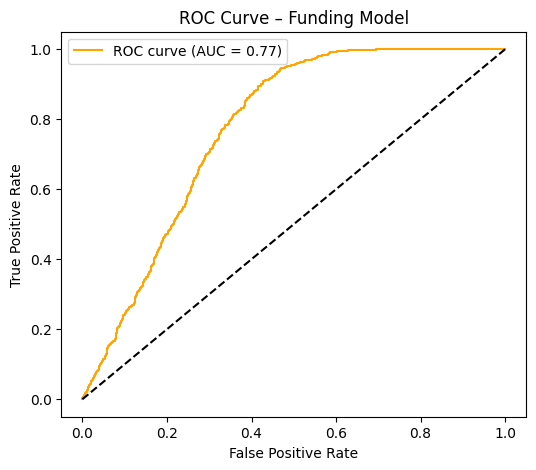

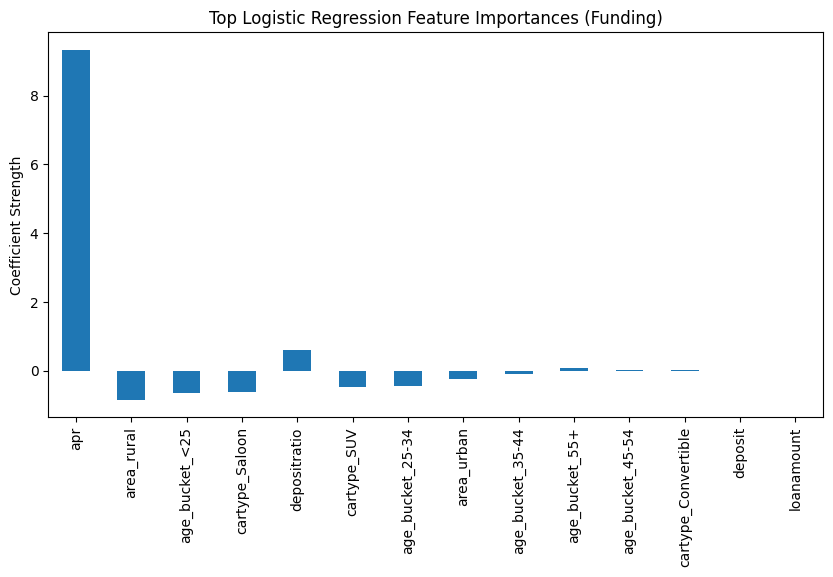

In [12]:
"""
Logistic Regression Model Evaluation – Funding Prediction
- Uses only approved applications (applicationoutcome == 1)
- Reports Accuracy, Precision, Recall, F1, ROC-AUC
"""

# Train-test split (funding model, approved subset only)
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X, y_funded, test_size=0.3, random_state=42)

log_reg.fit(X_train_f, y_train_f)
y_pred_f = log_reg.predict(X_test_f)
y_proba_f = log_reg.predict_proba(X_test_f)[:,1]

# Metrics
print("Funding Model Metrics")
print("Accuracy:", accuracy_score(y_test_f, y_pred_f))
print("Precision:", precision_score(y_test_f, y_pred_f))
print("Recall:", recall_score(y_test_f, y_pred_f))
print("F1:", f1_score(y_test_f, y_pred_f))
print("ROC-AUC:", roc_auc_score(y_test_f, y_proba_f))

# ROC Curve
fpr_f, tpr_f, _ = roc_curve(y_test_f, y_proba_f)
plt.figure(figsize=(6,5))
plt.plot(fpr_f, tpr_f, label="ROC curve (AUC = %.2f)" % roc_auc_score(y_test_f, y_proba_f), color="orange")
plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Funding Model")
plt.legend()
plt.show()

funded_coeff = pd.Series(
    log_reg.named_steps["classifier"].coef_[0], index=all_features
).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,5))
funded_coeff.head(15).plot(kind="bar")
plt.title("Top Logistic Regression Feature Importances (Funding)")
plt.ylabel("Coefficient Strength")
plt.show()

